**Atualizando a biblioteca para plotagem de gráficos**


In [470]:
!pip -q install plotly --upgrade

**Importando bibliotecas**

In [471]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrindo um arquivo CSV do drive**

In [472]:
base = pd.read_csv('/content/sample_data/heart-disease.csv', sep=',')

Conferir atributos nulos

In [473]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Tratar nulos

In [474]:
base.fillna(base.mean(), inplace=True)

In [475]:
base

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [476]:
base.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [477]:
base.tail(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


**Contando quantidade de instâncias**


In [478]:
np.unique(base['target'], return_counts=True)

(array([0, 1]), array([138, 165]))

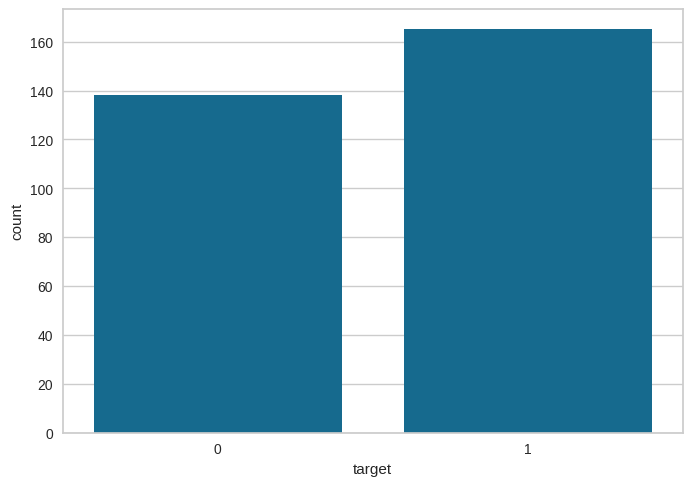

In [479]:
sns.countplot(x = base['target']);

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [480]:
from sklearn.preprocessing import LabelEncoder

In [481]:
#para codificar todos os atributos para laberEncoder de uma única vez
#base_encoded = base.apply(LabelEncoder().fit_transform)

In [482]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Crie um objeto StandardScaler
scaler = StandardScaler()

# Selecione as colunas numéricas para escalonar (excluindo a coluna target)
# numerical_cols = [ 'chol', 'thalach', 'oldpeak']

# Ajuste o scaler às colunas numéricas e transforme os dados
#base[numerical_cols] = scaler.fit_transform(base[numerical_cols])

# Crie um objeto OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Selecione as colunas categóricas (excluindo a coluna target)
categorical_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']

# Ajuste o encoder às colunas categóricas
encoder.fit(base.loc[:, categorical_cols])

# Transforme os dados categóricos
encoded_data = encoder.transform(base.loc[:, categorical_cols])

# Crie um novo DataFrame com os dados codificados
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatene o DataFrame codificado ao DataFrame original, mantendo a coluna target no final
base = pd.concat([base.drop(columns=categorical_cols), encoded_df, base[['target']]], axis=1)

# # Converta o DataFrame para um array NumPy
base_encoded = base.to_numpy()


target_index = base.columns.get_loc('target')
base_encoded = np.delete(base_encoded, target_index, axis=1)

In [483]:
base

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target
0,63,1,145,233,1,150,0,2.3,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,37,1,130,250,0,187,0,3.5,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,41,0,130,204,0,172,0,1.4,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,56,1,120,236,0,178,0,0.8,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,57,0,120,354,0,163,1,0.6,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
299,45,1,110,264,0,132,0,1.2,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
300,68,1,144,193,1,141,0,3.4,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
301,57,1,130,131,0,115,1,1.2,0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [484]:
#base_encoded = base.to_numpy()

In [485]:
base_encoded

array([[ 63.,   1., 145., ...,   1.,   0.,   0.],
       [ 37.,   1., 130., ...,   0.,   1.,   0.],
       [ 41.,   0., 130., ...,   0.,   1.,   0.],
       ...,
       [ 68.,   1., 144., ...,   0.,   0.,   1.],
       [ 57.,   1., 130., ...,   0.,   0.,   1.],
       [ 57.,   0., 130., ...,   0.,   1.,   0.]])

In [486]:
base_encoded.shape

(303, 27)

**Separar o dataset em variáveis independentes (X_prev) e dependentes (y_classe)**

In [487]:
X_prev= base_encoded[:, :-1]  # Supondo que a última coluna seja o target
y_classe = base_encoded[:, -1]

In [488]:
base_encoded.shape  # Imprime o novo shape

(303, 27)

**Método de amostragem Holdout**

In [489]:
from sklearn.model_selection import train_test_split

In [490]:
X_prev

array([[ 63.,   1., 145., ...,   0.,   1.,   0.],
       [ 37.,   1., 130., ...,   0.,   0.,   1.],
       [ 41.,   0., 130., ...,   0.,   0.,   1.],
       ...,
       [ 68.,   1., 144., ...,   0.,   0.,   0.],
       [ 57.,   1., 130., ...,   0.,   0.,   0.],
       [ 57.,   0., 130., ...,   0.,   0.,   1.]])

In [491]:
y_classe

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1.

In [492]:
y_classe.shape

(303,)

In [493]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_treino)
X_test_scaled = scaler.transform(X_teste)
pd.DataFrame(X_train_scaled).to_csv('X_train.csv', index=False)
pd.DataFrame(X_test_scaled).to_csv('X_test.csv', index=False)
pd.DataFrame(y_treino).to_csv('y_train.csv', index=False)
pd.DataFrame(y_teste).to_csv('y_test.csv', index=False)

In [494]:
X_treino.shape

(242, 26)

In [495]:
X_teste.shape

(61, 26)

In [496]:
X_teste

array([[ 57.,   1., 150., ...,   0.,   1.,   0.],
       [ 59.,   1., 170., ...,   0.,   0.,   0.],
       [ 57.,   1., 150., ...,   0.,   0.,   0.],
       ...,
       [ 68.,   1., 144., ...,   0.,   0.,   0.],
       [ 60.,   1., 145., ...,   0.,   0.,   0.],
       [ 50.,   1., 150., ...,   0.,   0.,   0.]])

In [497]:
y_treino

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1.

In [498]:
y_teste

array([0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1.])

Balancear

In [499]:
import pickle

In [500]:
with open('/content/sample_data/heart-disease.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)

Algoritmo de árvore de decisão

In [501]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [502]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 4, 6, 8 , 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

modelo = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=10,
    n_jobs=5,
    verbose=1,
)

In [503]:
# modelo.fit(X_treino, y_treino)
# print(modelo.best_params_)
# print(modelo.best_score_)

In [504]:
modelo= DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt', min_samples_leaf=2, min_samples_split=5)
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5)

Teste do modelo

In [505]:
previsoes = modelo.predict(X_teste)
previsoes

array([1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1.])

Acerto

In [506]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.8852459016393442

Matriz de Confusão

In [507]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[29,  4],
       [ 3, 25]])

0.8852459016393442

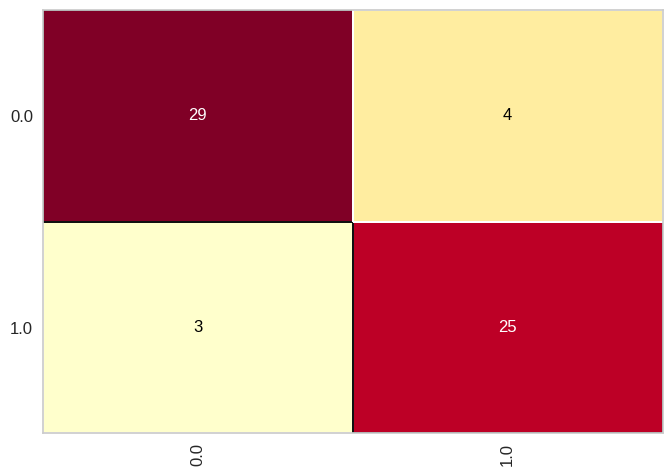

In [508]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [509]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89        33
         1.0       0.86      0.89      0.88        28

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



Árvore:

[Text(0.685, 0.9375, 'thal_1 <= 0.5\nentropy = 0.949\nsamples = 242\nvalue = [153, 89]\nclass = 0.0'),
 Text(0.645, 0.8125, 'thalach <= 150.5\nentropy = 0.595\nsamples = 104\nvalue = [15.0, 89.0]\nclass = 1.0'),
 Text(0.665, 0.875, 'True  '),
 Text(0.45, 0.6875, 'fbs <= 0.5\nentropy = 0.722\nsamples = 65\nvalue = [13, 52]\nclass = 1.0'),
 Text(0.3, 0.5625, 'chol <= 216.5\nentropy = 0.629\nsamples = 57\nvalue = [9, 48]\nclass = 1.0'),
 Text(0.12, 0.4375, 'thalach <= 117.5\nentropy = 0.874\nsamples = 17\nvalue = [5, 12]\nclass = 1.0'),
 Text(0.08, 0.3125, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = 0.0'),
 Text(0.16, 0.3125, 'cp_3 <= 0.5\nentropy = 0.75\nsamples = 14\nvalue = [3, 11]\nclass = 1.0'),
 Text(0.08, 0.1875, 'slope_0 <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [2, 5]\nclass = 1.0'),
 Text(0.04, 0.0625, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = 1.0'),
 Text(0.12, 0.0625, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = 1.0'),
 Text(0.24, 0.1875, 

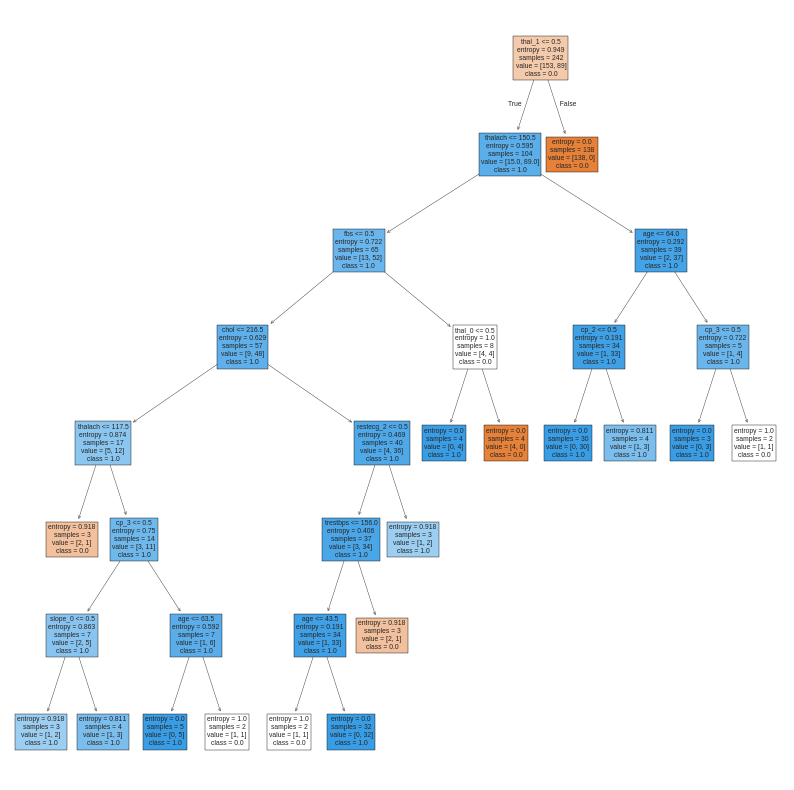

In [510]:
from sklearn import tree
import matplotlib.pyplot as plt

# Convert class names to strings
class_names = [str(c) for c in modelo.classes_]

# Get correct feature names
feature_names = base.columns

figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
tree.plot_tree(modelo, feature_names=feature_names, class_names=class_names, filled=True)